In [24]:
#1 Support Vector Machine

import numpy as np
import pandas as pd
from sklearn import svm


# No. of classes
c = 3


# Percentage of training data to be considered
p = [0.75, 0.8]



# Reading given data from csv to pandas dataframe
M = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',',header=None)

# Converting pandas dataframe to Numpy array
M = M.to_numpy()

# No. of samples
n = M.shape[0]


# No. of samples belonging to each class
n1 = n//3
n2 = n//3
n3 = n//3

# Row and column labels of Confusion matrix
cols = ['Predicted class1','Predicted class2','Predicted class3']
rows = ['Actual class1','Actual class2','Actual class3']

# Ennumerating the class labels
M = np.where(M=='Iris-setosa',1,M)
M = np.where(M=='Iris-versicolor',2,M)
M = np.where(M=='Iris-virginica',3,M)

# Converting M from object data type to float data type
M = M.astype(np.float)

# Dimension of feature vector
d = M.shape[1]-1


# Repeating the process considering 75% and 80% of total data as training data
for i in range(len(p)):
    # Initialization of confusion matrix with zeros
    C = np.zeros((c,c),dtype=int)
    
    # No. of training samples for each class
    n_tr1 = int(n1*p[i])
    n_tr2 = int(n2*p[i])
    n_tr3 = int(n3*p[i])
    n_tr = n_tr1+n_tr2+n_tr3
    
    # No. of testing samples for each class
    n_te1 = n1 - n_tr1
    n_te2 = n2 - n_tr2
    n_te3 = n3 - n_tr3
    n_te = n_te1+n_te2+n_te3
    
    # Initializing Matrix consisting of all the training data without class labels
    X_tr = np.zeros((1,d))
    
    # Initializing array consisting of class labels of training data samples
    y_tr = np.zeros(1)
    
    # Initializing Matrix consisting of all the testing data without class labels
    X_te = np.empty((1,d))
    
    # Initializing array consisting of predicted class labels of testing data samples
    y_pred = np.zeros(n_te)
    
    # Initializing array consisting of actual class labels of testing data samples
    y_act = np.empty(1)
    
    # Gathering training data, training targets, testing data, testing targets into separate Numpy arrays
    for j in range(c):
        start1 = j*n1
        stop1 = start1 + n_tr1
        start2 = stop1
        stop2 = start2 + n_te1
        X_tr = np.append(X_tr,M[start1:stop1,0:d],axis=0)
        y_tr = np.append(y_tr,M[start1:stop1,d],axis=0)
        X_te = np.append(X_te,M[start2:stop2,0:d],axis=0)
        y_act = np.append(y_act,M[start2:stop2,d],axis=0)
        
        
    # Deleting the initial row which was initialized as empty
    X_tr = np.delete(X_tr,0,axis=0)
    y_tr = np.delete(y_tr,0,axis=0)
    X_te = np.delete(X_te,0,axis=0)
    y_act = np.delete(y_act,0,axis=0)
    
    
    
    # Function to train SVM with the given training data and training targets
    clf = svm.SVC(kernel='linear')
    clf.fit(X_tr,y_tr)
    
       
    # Predicting test data class labels using SVM predict function and creating confusion matrix
    for j in range(n_te):
        temp = X_te[j,:].reshape(1,d)
        y_pred[j] = clf.predict(temp)
        temp1 = int(y_act[j]-1)
        temp2 = int(y_pred[j]-1)
        C[temp1,temp2] += 1 
    
    # Converting confusion matrix to pandas dataframe for display
    CM = pd.DataFrame(C,rows,cols)
    print('The confusion Matrix after class prediction using SVM (with',100*p[i],'% of data considered for training) is:\n',CM)
        
    
    # Calculation of accuracy for each class
    acc = []
    for j in range(c):
        temp1 = C[j,j]
        temp = np.sum(C,axis=1)
        acc.append(temp1/temp[j]) 
        
    print('With', 100*p[i],'% data considered for training the SVM prediction accuracy for each class is as follows:\n')
    
    for j in range(c):
        print('For class',j+1,'the accuracy is',round(100*acc[j],2),'%')


 





The confusion Matrix after class prediction using SVM (with 75.0 % of data considered for training) is:
                Predicted class1  Predicted class2  Predicted class3
Actual class1                13                 0                 0
Actual class2                 0                13                 0
Actual class3                 0                 1                12
With 75.0 % data considered for training the SVM prediction accuracy for each class is as follows:

For class 1 the accuracy is 100.0 %
For class 2 the accuracy is 100.0 %
For class 3 the accuracy is 92.31 %
The confusion Matrix after class prediction using SVM (with 80.0 % of data considered for training) is:
                Predicted class1  Predicted class2  Predicted class3
Actual class1                10                 0                 0
Actual class2                 0                10                 0
Actual class3                 0                 0                10
With 80.0 % data considered for traini

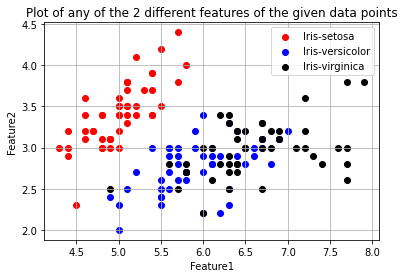

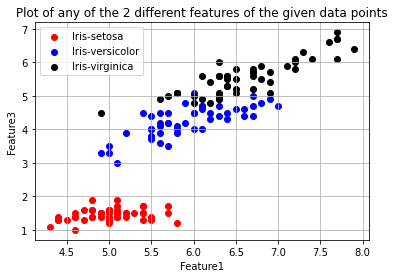

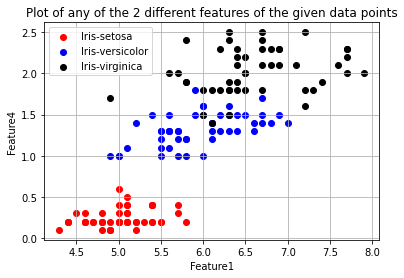

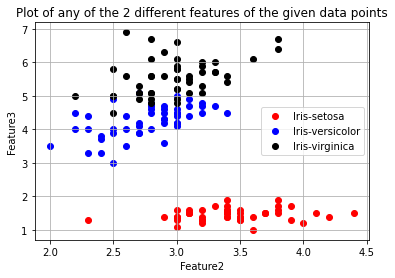

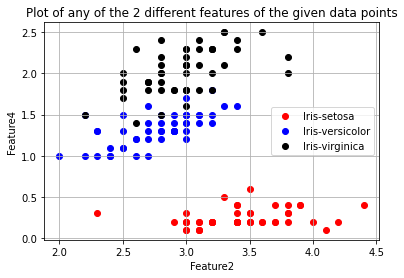

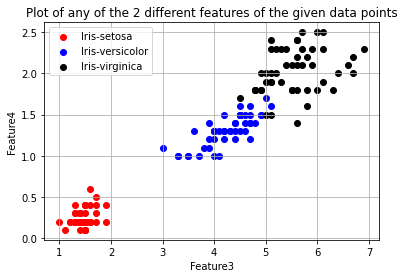

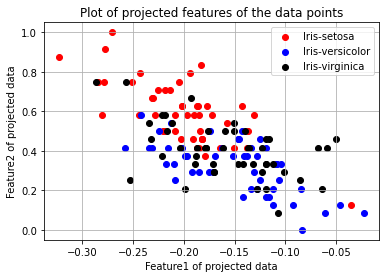

In [25]:
#2 Principal component analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Reading given data from csv to pandas dataframe
M = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',',header=None)

# Converting pandas dataframe to Numpy array
M = M.to_numpy()
n = M.shape[0]
n1 = n//3

# Dimension of feature vector
d = M.shape[1]-1

# No. of classes
c = 3

# Initialization of mean vector
u1 = np.zeros((4,1))


P = np.zeros((4,2))

min1 = []
max1 = []

# Ennumerating the class labels
M = np.where(M=='Iris-setosa',1,M)
M = np.where(M=='Iris-versicolor',2,M)
M = np.where(M=='Iris-virginica',3,M)

# Converting M from object data type to float data type
M = M.astype(np.float)

# Class labels and colors used for plotting
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['red','blue','black']


# Plotting the scatter plot for all possible combinations of features
# Creating a figure window


l = 1
for i in range(0,d-1):
    for j in range(i+1,d):
        fig1 = plt.figure()
        for k in range(c):
            plt.scatter(M[k*n1:k*n1+n1-1,i],M[k*n1:k*n1+n1-1,j],color=colors[k],label=labels[k])
        str1 = 'Feature' + str(i+1)
        str2 = 'Feature' + str(j+1)
        str3 = '2D Scatter plot of Feature' + str(i+1) + ' vs Feature' + str(j+1)
        plt.title('Plot of any of the 2 different features of the given data points')
        plt.xlabel(str1)
        plt.ylabel(str2)
        plt.legend()
        plt.grid()
        l+=1


# Normalization the given data using min-max normalization
X = M[:,0:d]

for i in range(d):
    min1.append(np.amin(X[:,i]))
    max1.append(np.amax(X[:,i]))
    X[:,i] = (X[:,i]-min1[i])/(max1[i]-min1[i])
    

# Covariance matrix of normalized data
cov1 = np.cov(X,rowvar=False)  

# Calculating the eigen values and eigen vectors
e_va,e_ve = np.linalg.eig(cov1)

# Sorting the eigen values in ascending order
e_va_sorted = np.sort(e_va)

# Looking for eigen vectors corresponding first 2 largest eigen values
ind1 = np.where(e_va==e_va_sorted[d-1])
pc1 = e_ve[ind1]
ind2 = np.where(e_va==e_va_sorted[d-2])
pc2 = e_ve[ind2]

# Building the transformation matrix using the principal components  
P[:,0:1] = pc1.T 
P[:,1:2] = pc2.T   


# Obtaining the projected data
Y = np.matmul(X,P)


# Creating a new figure window
fig2 = plt.figure()
plt.title('Plot of projected features of the data points')

# Plotting the scatter plot of the projected data
for k in range(c):
    plt.scatter(Y[k*n1:k*n1+n1-1,0],M[k*n1:k*n1+n1-1,1],color=colors[k],label=labels[k])
plt.xlabel('Feature1 of projected data')
plt.ylabel('Feature2 of projected data')
plt.legend()
plt.grid()


